In [1]:
%pip install pytholog


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install numpy


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install matplotlib


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
from numpy import array

In [6]:
A = """
.XXX.
X...X
XXXXX
X...X
X...X
"""
T = """
XXXXX
..X..
..X..
..X..
..X..
"""

E = """
XXXXX
X....
XXX..
X....
XXXXX
"""

In [7]:
def to_vector(letter):
    return array([+1 if c=='X' else 0 for c in letter.replace('\n','')])

In [8]:
a_vec = to_vector(A)
t_vec = to_vector(T)
e_vec = to_vector(E)

In [9]:
def display(pattern):
    from pylab import imshow, cm, show
    imshow(pattern.reshape((5,5)),cmap=cm.binary, interpolation='nearest')
    show()

In [10]:
new_char = """
..X..
.X.X.
X...X
XXXXX
X...X
"""

In [14]:
new_vec = to_vector(new_char)
new_vec

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1])

In [12]:
def histogram(pattern):
  h = np.array([0, 0, 0, 0, 0])
  row = 0
  for ch in pattern:
    if row < 5:
      row = row + 1
    else:
      row = 1
    if ch == 1:
        h[row-1] = h[row-1] + 1
  #  print(row,' - ', ch)
  return h

In [13]:
#alternative
def histogram(pattern):
    pattern = np.array(pattern).reshape(5, 5)
    return np.sum(pattern, axis=0)

In [16]:
np.array(new_vec).reshape(5, 5)

array([[0, 0, 1, 0, 0],
       [0, 1, 0, 1, 0],
       [1, 0, 0, 0, 1],
       [1, 1, 1, 1, 1],
       [1, 0, 0, 0, 1]])

In [17]:
histogram(new_vec)

array([3, 2, 2, 2, 3])

In [19]:
from scipy.spatial import distance

In [25]:
dst_a = distance.euclidean(histogram(new_vec), histogram(a_vec))
dst_t = distance.euclidean(histogram(new_vec), histogram(t_vec))
dst_e = distance.euclidean(histogram(new_vec), histogram(e_vec))
print('a:',dst_a,', t:',dst_t,', e:',dst_e)

a: 1.4142135623730951 , t: 4.358898943540674 , e: 2.6457513110645907


In [26]:
#alternative
def vertical_histogram(pattern):
    pattern = np.array(pattern).reshape(5, 5)
    return np.sum(pattern, axis=1)

In [27]:
dst_a = distance.euclidean(vertical_histogram(new_vec), vertical_histogram(a_vec))
dst_t = distance.euclidean(vertical_histogram(new_vec), vertical_histogram(t_vec))
dst_e = distance.euclidean(vertical_histogram(new_vec), vertical_histogram(e_vec))
print('a:',dst_a,', t:',dst_t,', e:',dst_e)

a: 4.69041575982343 , t: 5.916079783099616 , e: 6.557438524302


In [32]:
import matplotlib.pyplot as plt

In [34]:
ai_img = plt.imread("lesson8_files/ai.png")
ai_img

array([[[1.        , 0.43137255, 0.00784314],
        [1.        , 0.43529412, 0.00784314],
        [1.        , 0.43137255, 0.00784314],
        ...,
        [1.        , 0.42745098, 0.        ],
        [1.        , 0.42745098, 0.        ],
        [1.        , 0.43137255, 0.        ]],

       [[1.        , 0.43137255, 0.00784314],
        [1.        , 0.43137255, 0.00784314],
        [1.        , 0.43137255, 0.00784314],
        ...,
        [1.        , 0.42745098, 0.        ],
        [1.        , 0.42745098, 0.        ],
        [1.        , 0.42745098, 0.        ]],

       [[1.        , 0.43137255, 0.00784314],
        [1.        , 0.43137255, 0.00784314],
        [1.        , 0.43137255, 0.00784314],
        ...,
        [1.        , 0.42745098, 0.        ],
        [1.        , 0.42745098, 0.        ],
        [1.        , 0.42745098, 0.        ]],

       ...,

       [[1.        , 0.43137255, 0.00784314],
        [1.        , 0.43137255, 0.00784314],
        [1.        , 0

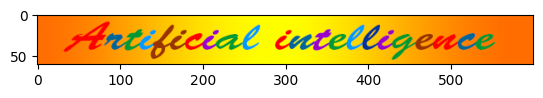

In [35]:
plt.imshow(ai_img)

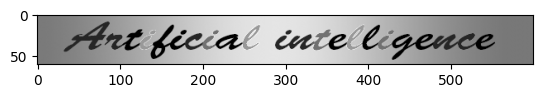

In [36]:
data_gray = np.mean(ai_img, axis=2)
plt.imshow(data_gray, cmap='gray')
plt.show()

In [38]:
%pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 9.1 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [39]:
import cv2

In [41]:
image_src = cv2.imread('lesson8_files/ai.png')
image_gray = cv2.cvtColor(image_src, cv2.COLOR_BGR2GRAY)

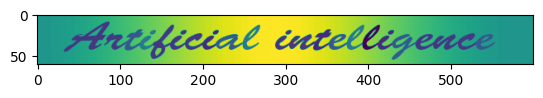

In [43]:
plt.imshow(image_gray)

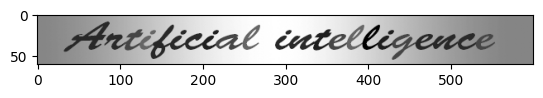

In [44]:
plt.imshow(image_gray, cmap='gray')

In [45]:
thresh_val = 127

In [46]:
th, image_b = cv2.threshold(src=image_gray, thresh=thresh_val, maxval=255, type=cv2.THRESH_BINARY)

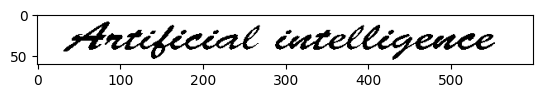

In [48]:
plt.imshow(image_b, cmap="gray")

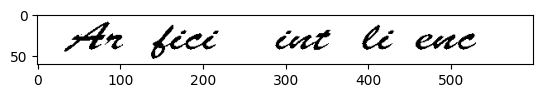

In [49]:
thresh_val = 88
th, image_b = cv2.threshold(src=image_gray, thresh=thresh_val, maxval=255, type=cv2.THRESH_BINARY)
plt.imshow(image_b, cmap="gray")

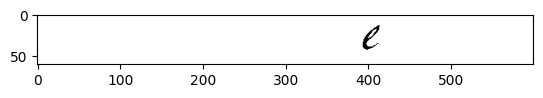

In [50]:
thresh_val = 64
th, image_b = cv2.threshold(src=image_gray, thresh=thresh_val, maxval=255, type=cv2.THRESH_BINARY)
plt.imshow(image_b, cmap="gray")

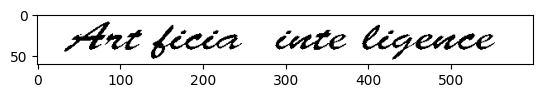

In [51]:
thresh_val = 96
th, image_b = cv2.threshold(src=image_gray, thresh=thresh_val, maxval=255, type=cv2.THRESH_BINARY)
plt.imshow(image_b, cmap="gray")

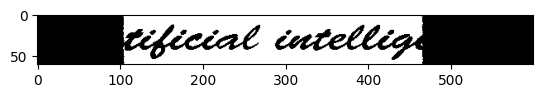

In [52]:
thresh_val = 170
th, image_b = cv2.threshold(src=image_gray, thresh=thresh_val, maxval=255, type=cv2.THRESH_BINARY)
plt.imshow(image_b, cmap="gray")

In [53]:
image_b.shape

(60, 600)

In [54]:
from numpy import asarray

In [85]:
numpydata = asarray(image_b)

In [56]:
numpydata.shape

(60, 600)

In [57]:
numpydata[0, 0]

np.uint8(0)

In [58]:
numpydata[5, 500]

np.uint8(0)

In [59]:
numpydata[45, 245]

np.uint8(255)

In [61]:
char_a1 = cv2.imread('lesson8_files/a1.png')

In [62]:
char_a1.shape

(24, 24, 3)

In [63]:
numpydata = asarray(char_a1)

In [64]:
numpydata

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [223, 223, 223],
        [  0,   0,   0],
        ...,
        [176, 176, 176],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [234, 234, 234],
        [212, 212, 212],
        ...,
        [223, 223, 223],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [66]:
image_gray = cv2.cvtColor(char_a1, cv2.COLOR_BGR2GRAY)

In [67]:
thresh_val = 127

In [68]:
th, image_b = cv2.threshold(src=image_gray, thresh=thresh_val, maxval=255, type=cv2.THRESH_BINARY)

In [69]:
numpydata = asarray(image_b)

In [71]:
numpydata

array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255,   0,   0,   0,   0,
          0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255,   0,   0,   0,   0,
          0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,
          0,   0, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,
          0,   0, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,
          0,   0,   0, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255,   0,   0,   0,   0, 255,   0,
          0,   0,   0, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255

In [87]:
numpydata_original = numpydata

In [88]:
# Convert to 1D vector
numpydata = numpydata // 255
numpydata = numpydata.flatten()
numpydata = np.where(numpydata == 0, 1, 0)

In [89]:
from pylab import imshow, cm, show

In [90]:
def display_image(image):
    imshow(image.reshape((24, 24)), cmap=cm.binary, interpolation='nearest')
    show()

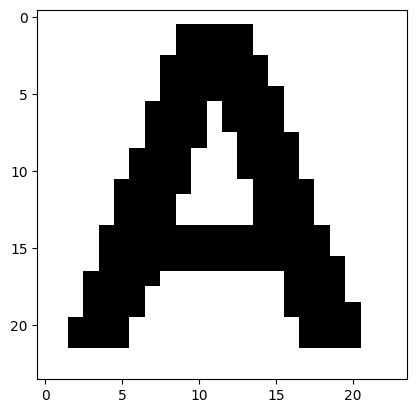

In [91]:
display_image(numpydata)

In [92]:
char_b1 = cv2.imread('lesson8_files/b1.png')
char_x1 = cv2.imread('lesson8_files/x1.png')

In [93]:
b1_data = asarray(char_b1)
x1_data = asarray(char_x1)

In [94]:
b1_gray = cv2.cvtColor(char_b1, cv2.COLOR_BGR2GRAY)
x1_gray = cv2.cvtColor(char_x1, cv2.COLOR_BGR2GRAY)

In [95]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# 1. Function for converting to grayscale
def to_grayscale(path):
    return cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2GRAY)

# 2. Function for binarization
def binarize_image(image, thresh_val=127):
    _, binary_image = cv2.threshold(src=image, thresh=thresh_val, maxval=255, type=cv2.THRESH_BINARY)
    return binary_image

# 3. Function for visualization
def display_image(image):
    from pylab import imshow, cm, show
    # Swap 0 with 1 and vice versa
    imshow(image.reshape((24, 24)), cmap=cm.binary, interpolation='nearest')
    show()

In [96]:
image_paths_a = ["lesson8_fies/a1.png", "lesson8_fies/a2.png", "lesson8_fies/a3.png"]
image_paths_b = ["lesson8_fies/b1.png", "lesson8_fies/b2.png", "lesson8_fies/b3.png"]
image_paths_x = ["lesson8_fies/x1.png", "lesson8_fies/x2.png", "lesson8_fies/x3.png"]

def process_group(image_paths):
    vectors = []
    for i, path in enumerate(image_paths):
        # 1. Conversion to grayscale
        grayscale_image = to_grayscale(path)

        # 2. Binarization
        binary_image = binarize_image(grayscale_image, thresh_val=127)

        # 3. Convert to 1D vector (0 -> 1, 255 -> 0)
        binary_image = binary_image // 255
        binary_image = binary_image.flatten()
        binary_vector = np.where(binary_image == 0, 1, 0)

        # Save the vector to a list
        vectors.append(binary_vector)

    return vectors

In [98]:
# Paths to images
image_paths_a = ["lesson8_files/a1.png", "lesson8_files/a2.png", "lesson8_files/a3.png"]
image_paths_b = ["lesson8_files/b1.png", "lesson8_files/b2.png", "lesson8_files/b3.png"]
image_paths_x = ["lesson8_files/x1.png", "lesson8_files/x2.png", "lesson8_files/x3.png"]

image_paths_unk = ["lesson8_files/unknown_char1.png", "lesson8_files/unknown_char2.png", "lesson8_files/unknown_char3.png"]

# Processing groups of images
vectors_a = process_group(image_paths_a)
vectors_b = process_group(image_paths_b)
vectors_x = process_group(image_paths_x)

vectors_unk = process_group(image_paths_unk)

In [102]:
from scipy.spatial import distance

def compare_histograms(vectors_unk, vectors_ref, metric=distance.euclidean):
    distances = []
    for unk_vector in vectors_unk:
        unk_distances = [
            metric(histogram(unk_vector), histogram(ref_vector))
            for ref_vector in vectors_ref
        ]
        distances.append(unk_distances)
    return distances

In [103]:
# Comparison with groups A, B, X
distances_to_a = compare_histograms(vectors_unk, vectors_a, metric=distance.cosine)
distances_to_b = compare_histograms(vectors_unk, vectors_b, metric=distance.cosine)
distances_to_x = compare_histograms(vectors_unk, vectors_x, metric=distance.cosine)

# Output distances
print("Distances to group A😊")
for i, distances in enumerate(distances_to_a):
    print(f"Unknown {i+1}: {distances}")

print("\nDistances to group B😊")
for i, distances in enumerate(distances_to_b):
    print(f"Unknown {i+1}: {distances}")

print("\nDistances to group X😊")
for i, distances in enumerate(distances_to_x):
    print(f"Unknown {i+1}: {distances}")

ValueError: cannot reshape array of size 576 into shape (5,5)